# Group Assignment | Machine Learning

Use of the preprocessed data to train several machine learning networks to predict ALDH1 inhibition. Use of Autogluon to  test many ML approaches to find optimal architecture type. Environment requires Rdkit, Autogluon (Used python 3.8 as autogluon is not available in 3.11) and sci-kit learn.
More environment information available in environment.yml. 


Use the `conda env create -f environment.yml
` command to install the environment.


Otherwise use:

```python
conda create --name 8CC00 python=3.8
pip install autogluon rdkit seaborn matplotlib scikit-learn

```

Also check the machinelearning_exploration.py file for exploration of various standard networks such as  Adaboost, GradientBoost, Randomforest and SupportVectorMachine.

In [15]:
#Library Import
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import sklearn.metrics as metrics
from preprocessing import smile_to_df
import matplotlib.pyplot as plt
import csv


In [22]:
#input all relevant csv's 
df1, _ = smile_to_df('tested_molecules-1.csv')
df2, _ = smile_to_df('tested_molecules_v2.csv')
df_test,original_df =  smile_to_df('untested_molecules.csv')
df1.set_index('ALDH1_inhibition', inplace=True)
df2.set_index('ALDH1_inhibition', inplace=True)
#both training datasets are combined
df = pd.concat([df1, df2])

#Save to csv. This can be loaded in the 
df.to_csv("processed_data.csv", index=True)

In [23]:
#store smiles of untested molecules in index_test
index_test = pd.DataFrame({'Index': df_test.index.values})
#store unaltered tested dataset, for evaluation purposes
orig_df_test = df_test
df_test = df_test.reset_index(drop=True)

print(index_test.head())
print(index_test.iloc[0])

                                                     Index
0              CCCCC/C(=N\NC(=O)CCC(=O)NCc1ccccc1)c1ccccc1
1  Cc1ccc(S(=O)(=O)N2CCC(C(=O)OCC(=O)N3CCc4ccccc43)CC2)cc1
2    COc1ccc(N2C(=O)CC(Nc3ccc(F)cc3)C2=O)c([N+](=O)[O-])c1
3  Cc1cc(C)cc(OCC(=O)O[NH+]=C(N)Cc2ccc([N+](=O)[O-])cc2)c1
4                  NNC(=O)C=C1CCN(c2ncc(C(F)(F)F)cc2Cl)CC1
Index    CCCCC/C(=N\NC(=O)CCC(=O)NCc1ccccc1)c1ccccc1
Name: 0, dtype: object


In [24]:
df_filtered= df.reset_index()
#get label dataframe
y = df_filtered.iloc[:,0]
#get all features
X = df_filtered.loc[:, df_filtered.columns != 'ALDH1_inhibition']

print(df)

                  MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
ALDH1_inhibition                                                         
1                          0.883077        0.883077           0.001001   
1                          0.807622        0.807622           0.057684   
1                          0.703186        0.703186           0.014533   
1                          0.757426        0.757426           0.233129   
1                          0.802564        0.802564           0.074898   
...                             ...             ...                ...   
1                          0.828750        0.828750           0.144158   
1                          0.766854        0.766854           0.084314   
1                          0.715574        0.715574           0.021802   
1                          0.839472        0.839472           0.082297   
1                          0.852619        0.852619           0.003396   

                  MinEStateIndex     

In [25]:
#create training set, validation set and test set 0.8:0.1:0.1 division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size =0.5, random_state=1)

In [26]:

#join training features and labels for autogluon
train_set = pd.concat([X_train, y_train], axis=1)
#get label column name
label = 'ALDH1_inhibition'
#run algorithms on training set
predictor = TabularPredictor(label=label, eval_metric='precision').fit(train_set)
val_set =  pd.concat([X_val, y_val], axis=1)
#shows leaderboard of all algorithms
predictor.leaderboard(val_set, silent=True)

No path specified. Models will be saved in: "AutogluonModels\ag-20230618_100920\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230618_100920\"
AutoGluon Version:  0.8.0
Python Version:     3.8.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   378.19 GB / 998.59 GB (37.9%)
Train Data Rows:    1600
Train Data Columns: 209
Label Column: ALDH1_inhibition
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                  

	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 15 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Useless Original Features (Count: 14): ['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'EState_VSA11', 'fr_HOCCN', 'fr_azide', 'fr_azo', 'fr_benzodiazepine', 'fr_diazo', 'fr_isocyan', 'fr_isothiocyan', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd']
		These features carry no predictive signal and should be manually investigated.
		This is typically a feature which has the same value for all rows.
		These features do not need to be present at inference time.
	Unused 

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,1.000000,1.000000,0.007503,0.004000,0.837774,0.007503,0.004000,0.837774,1,True,3
1,LightGBMLarge,1.000000,1.000000,0.009554,0.004606,2.342827,0.009554,0.004606,2.342827,1,True,13
2,WeightedEnsemble_L2,1.000000,1.000000,0.014503,0.005501,2.246809,0.007000,0.001500,1.409034,2,True,14
3,LightGBM,0.961538,1.000000,0.007001,0.003999,0.977966,0.007001,0.003999,0.977966,1,True,4
4,RandomForestGini,0.947368,0.888889,0.051616,0.045077,0.437362,0.051616,0.045077,0.437362,1,True,5
5,RandomForestEntr,0.944444,0.868852,0.051555,0.044571,0.428926,0.051555,0.044571,0.428926,1,True,6
6,ExtraTreesGini,0.914286,0.850746,0.050563,0.042573,0.403570,0.050563,0.042573,0.403570,1,True,8
7,ExtraTreesEntr,0.911765,0.903226,0.054086,0.044071,0.403794,0.054086,0.044071,0.403794,1,True,9
8,NeuralNetTorch,0.888889,0.916667,0.066097,0.048676,1.453433,0.066097,0.048676,1.453433,1,True,12
9,NeuralNetFastAI,0.883721,0.814286,0.027564,0.012573,1.288928,0.027564,0.012573,1.288928,1,True,10


In [27]:
#select model
predictor.delete_models(models_to_keep='CatBoost', dry_run=False) 
#run and evaluate selected model on self-made test set
test_set =  pd.concat([X_test, y_test], axis=1)
y_true = test_set[label] 
y_pred = predictor.predict(test_set)  
print(confusion_matrix(y_true, y_pred))

Deleting model KNeighborsUnif. All files under AutogluonModels\ag-20230618_100920\models\KNeighborsUnif\ will be removed.
Deleting model KNeighborsDist. All files under AutogluonModels\ag-20230618_100920\models\KNeighborsDist\ will be removed.
Deleting model LightGBMXT. All files under AutogluonModels\ag-20230618_100920\models\LightGBMXT\ will be removed.
Deleting model LightGBM. All files under AutogluonModels\ag-20230618_100920\models\LightGBM\ will be removed.
Deleting model RandomForestGini. All files under AutogluonModels\ag-20230618_100920\models\RandomForestGini\ will be removed.
Deleting model RandomForestEntr. All files under AutogluonModels\ag-20230618_100920\models\RandomForestEntr\ will be removed.
Deleting model ExtraTreesGini. All files under AutogluonModels\ag-20230618_100920\models\ExtraTreesGini\ will be removed.
Deleting model ExtraTreesEntr. All files under AutogluonModels\ag-20230618_100920\models\ExtraTreesEntr\ will be removed.
Deleting model NeuralNetFastAI. All 

[[139   4]
 [ 33  24]]


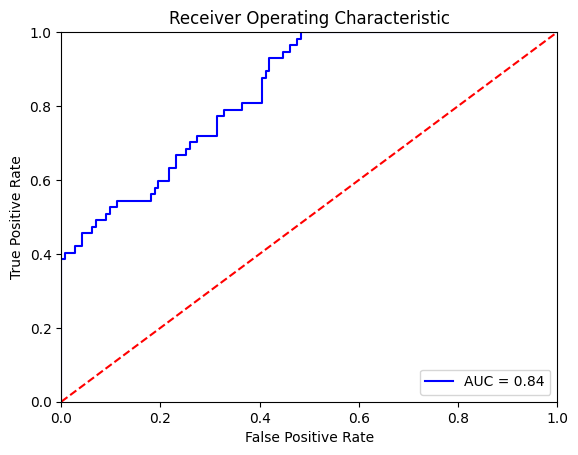

In [28]:
#print roc curve selected model on test set
probs = predictor.predict_proba(test_set)
preds = probs[1]
fpr, tpr, threshold = metrics.roc_curve(test_set[label], preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
def probs_to_csv(probs,original_data):
    '''
    Input: 
        probs[pandas Series]: raw prediciton values for positive classification
        original_data[pandas Dataframe]: original dataset
    Output: 
        csv file with 100 best molecules
    '''
    sorted_probs = probs.sort_values(ascending=False)
    #get best 100 molecules indices
    best_100_indices = sorted_probs.index[0:100]
    
    #get string molecule of every molecule index
    smiles = []
    for i in best_100_indices:
        smiles.append(original_data.iloc[i].item())
    #output csv file
    with open('output.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        for item in smiles:
            writer.writerow([item])


In [30]:
# run model on untested molecules set
probs = predictor.predict_proba(df_test)
preds = probs[1]
# build output csv best 100 probabilities
probs_to_csv(probs[1], index_test)


#check if smile is consistent with input dataframe and postprocessing dataframe
print("Value index in index dataset is",index_test.iloc[preds.argmax()].item())
print("Value index in original dataset is",orig_df_test.iloc[preds.argmax()].name)
#check whether index of the outcome probabilities matches the index of the input dataset
probs_sorted = probs[1].sort_values(ascending=False)
test_prob = predictor.predict_proba(df_test.iloc[probs_sorted.index[0]:probs_sorted.index[0]+1])
print(test_prob[1].item())
print(probs[1].max())

#threshold is based on worst confidence of best 100 of the test dataset
#this way, the expected performance of the unseen dataset can be estimated using the test dataset
threshold = preds.sort_values(ascending=False).iloc[100]

#tproduce evaluation metrics on self-made test dataset
probs = predictor.predict_proba(X_test)
preds = probs[1]
preds = preds > threshold
precision = precision_score(y_test, preds)
print("Threshold is", threshold)
print("Precision above threshold is", precision*100, "%")


Value index in index dataset is CC(=O)OC1CC2C(C)(C)C(=O)CC[C@]2(C)C2CC[C@@]3(C)C(c4ccoc4)OC(=O)C4OC43[C@]12C
Value index in original dataset is CC(=O)OC1CC2C(C)(C)C(=O)CC[C@]2(C)C2CC[C@@]3(C)C(c4ccoc4)OC(=O)C4OC43[C@]12C
0.6992433667182922
0.6992433667182922
Threshold is 0.5882083177566528
Precision above threshold is 100.0 %
